### ABHISHEK SINGH
### 15BCE1009
#### LAB 3 CBIR

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import cv2, pickle, glob

bins_array = [[8,8,8], [16,16,16], [32,32,32], [64,64,64]]



def descriptor(image):
    # compute a 3D histogram in the RGB colorspace,
    # then normalize the histogram so that images
    # with the same content, but either scaled larger
    # or smaller will have (roughly) the same histogram
    hist = cv2.calcHist([image], [0, 1, 2],
                        None, bins,
                        [0, 256, 0, 256, 0, 256])
    # hist = cv2.normalize(hist)
    # return out 3D histogram as a flattened array
    return hist.flatten()

def indexor(save_index):
    # initialize the index dictionary to store our our quantifed
    # images, with the 'key' of the dictionary being the image
    # filename and the 'value' our computed features
    index = {}

    # use glob to grab the image paths and loop over them
    for imagePath in glob.glob(database + "/*.*"):
        # extract our unique image ID (i.e. the filename)
        k = imagePath[imagePath.rfind("/") + 1:]

        # load the image, describe it using our RGB histogram
        # descriptor, and update the index
        image = cv2.imread(imagePath)
        features = descriptor(image)
        index[k] = features
    if save_index:
        # we are now done indexing our image -- now we can write our
        # index to disk
        with open('index', 'wb') as f:
            f.write(pickle.dumps(index))
    return index

bins = bins_array[0]
database = 'image/'
# index the database
index = indexor(False)

def _display(cv_image, title='Image'):
    """Convert OpenCV images from BGR to RGB for Pyplot"""
    plt_image = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)
    plt.title(title)
    plt.imshow(plt_image)
    plt.show()
    return True

def _chi2_distance(histA, histB, eps=1e-10):
    # compute the chi-squared distance
    d = 0.5 * np.sum([((a - b) ** 2) / (a + b + eps)
                      for (a, b) in zip(histA, histB)])
    # return the chi-squared distance
    return d

def query(query, rank, precision_recall=False, relevant=None):
    """Performs an image query in the CBIR database"""
    # load the query image and show it
    print("Reading and analysing the query image...")
    query_image= cv2.imread(query)
    _display(cv_image=query_image, title='Query')
    # describe the query in the same way that we did in
    # index.py -- a 3D RGB histogram with 8 bins per channel
    query_features = descriptor(query_image)
    print("Wait while it's searching...")
    results = search(query_features)

    print("Hmm so the results are...")
    # loop over the top ranks
    for j in range(rank):
        # grab the result (we are using row-major order) and
        # load the result image
        (score, imageName) = results[j]
        path = database + "/%s" % (imageName)
        result = cv2.imread(path)
        _display(result)

    if precision_recall == True and relevant is not None:
        result_images = [i[1] for i in results]
        relevant_ranks = sorted([result_images.index(x)+1 for x in relevant])
        num_relevant = range(len(relevant))
        precision = np.divide(num_relevant, relevant_ranks)
        recall = np.divide(num_relevant, len(relevant))
        # plot precision-recall curve
        plt.plot(recall, precision, 'r.-')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Graph for Bins : {}'.format(bins))
        plt.axis([0, 1, 0, 1.05])
        plt.show()

    return None

    
def search(query_features):
    # initialize our dictionary of results
    results = {}

    # loop over the index
    for (k, features) in index.items():
        # compute the chi-squared distance between the features
        # in our index and our query features -- using the
        # chi-squared distance which is normally used in the
        # computer vision field to compare histograms
        d = _chi2_distance(features, query_features)

        # now that we have the distance between the two feature
        # vectors, we can udpate the results dictionary -- the
        # key is the current image ID in the index and the
        # value is the distance we just computed, representing
        # how 'similar' the image in the index is to our query
        results[k] = d

    # sort our results, so that the smaller distances (i.e. the
    # more relevant images are at the front of the list)
    results = sorted([(v, k) for (k, v) in results.items()])

    # return our results
    return results

Reading and analysing the query image...


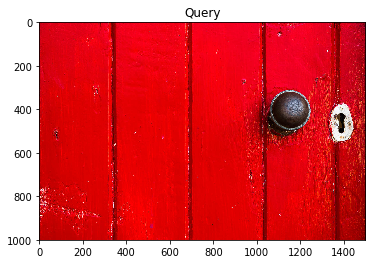

Wait while it's searching...
Hmm so the results are...


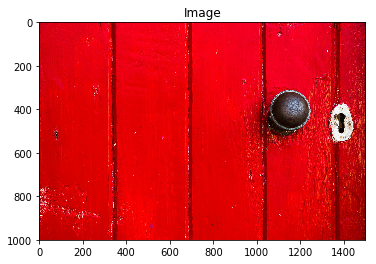

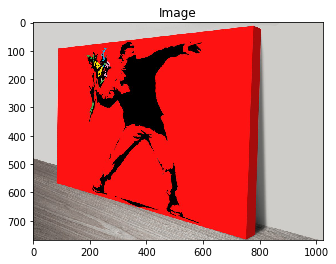

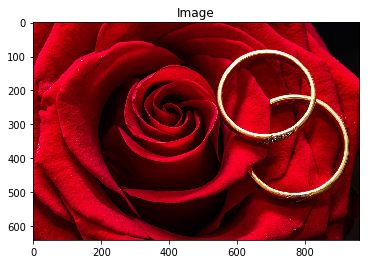

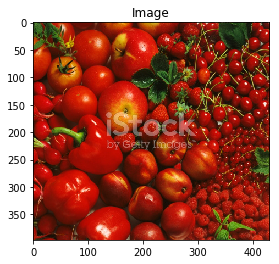

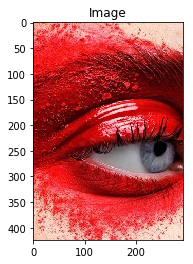

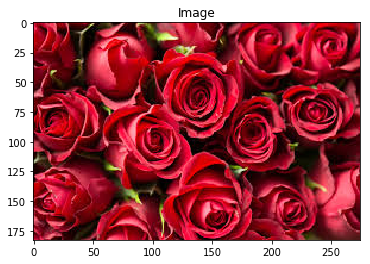

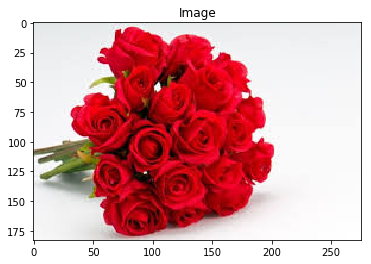

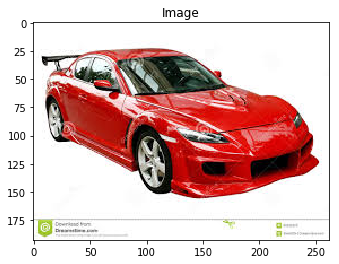

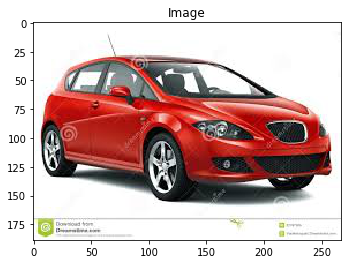

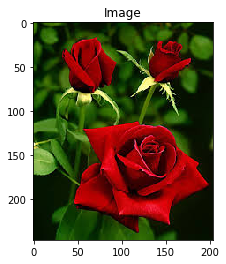

In [9]:
query('image/red.jpg', 10)

## Precision & Recall  
**With Variable Histogram Bin Sizes**

Precision-Recall graphs measure the accuracy of our image retrieval system. They are also used in the performance measurement of any other search engine.

**Precision**  
Precision is the total relevant images retrieved from a collection of relevant and irrelevant images. It denotes how _precise_ the system is in accurately retreiving useful results from an impure or noisy collection of items. 
```
precision = relevant_items_retrieved / (relevant_items + irrelevant_items)
```

**Recall**  
Recall is the ratio of the relevant images retrieved to all the relevant images in the database. It denotes the how well the system _recalls_ the relevant images from the all the existing relevant images.  
```
recall = relevant_items_retrieved / total_relevant_items
```

**Testing CBIR engine performance with Bin Size : 8**

Reading and analysing the query image...


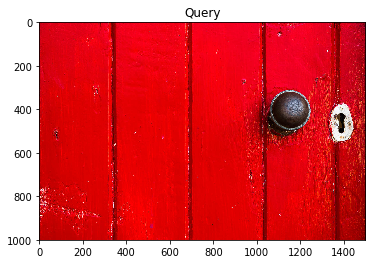

Wait while it's searching...
Hmm so the results are...


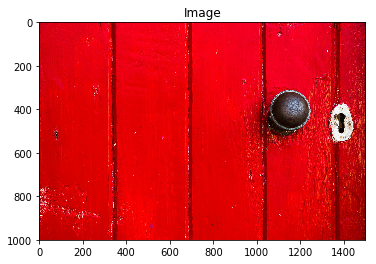

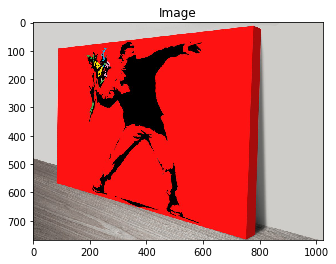

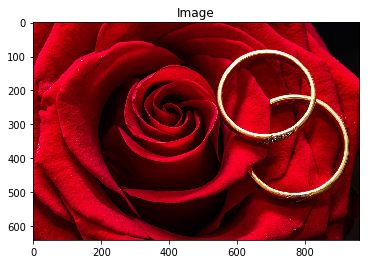

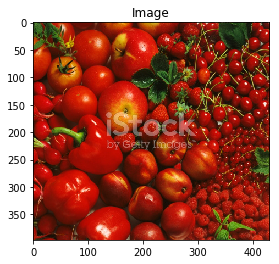

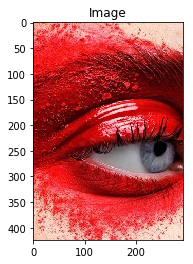

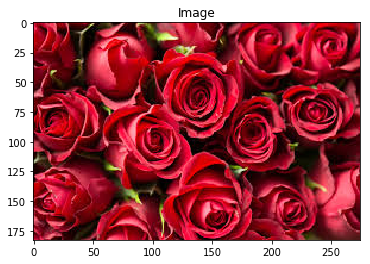

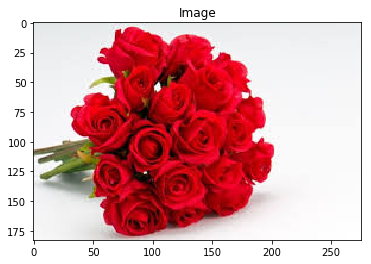

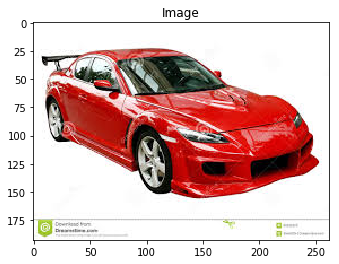

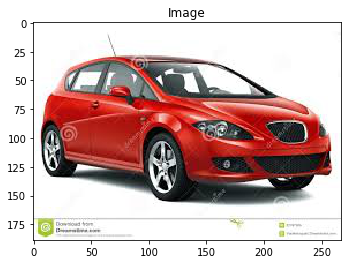

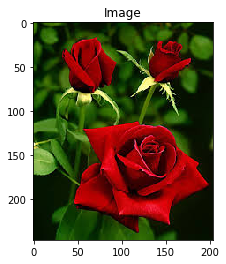

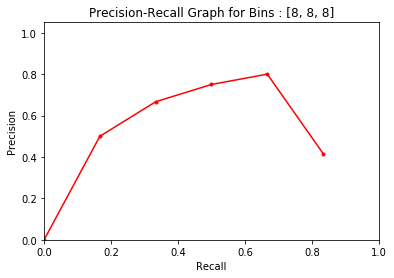

In [14]:
query(query='image/red.jpg', rank=10,
             precision_recall=True,
             relevant=['red.jpg', '39.jpg', '38.jpg', '40.jpg', '44.jpg', '30.jpg'])

In [15]:
bins = bins_array[1]

**Testing CBIR engine performance with Bin Size : 16**

**Testing CBIR engine performance with Bin Size : 16**

Reading and analysing the query image...


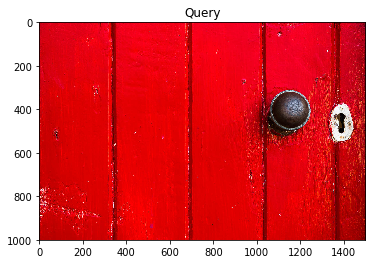

Wait while it's searching...
Hmm so the results are...


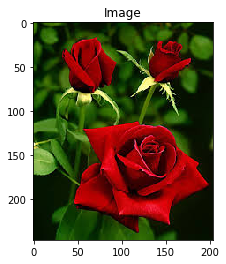

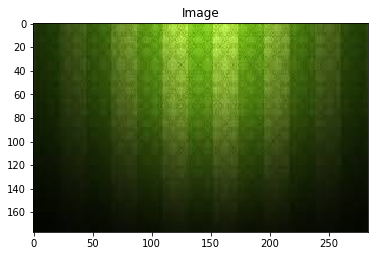

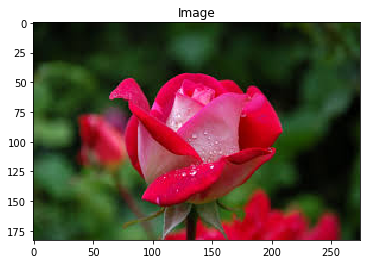

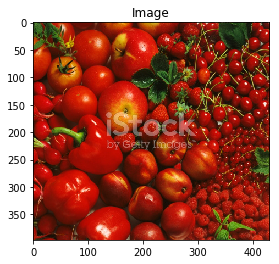

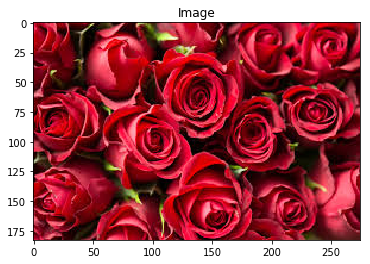

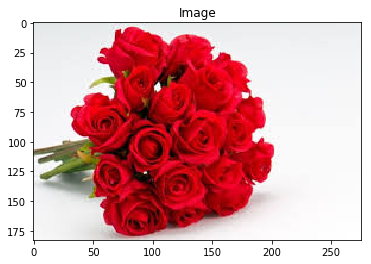

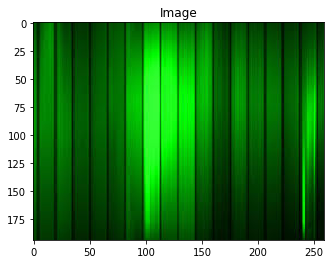

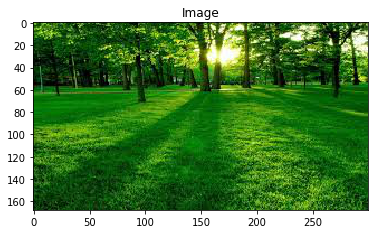

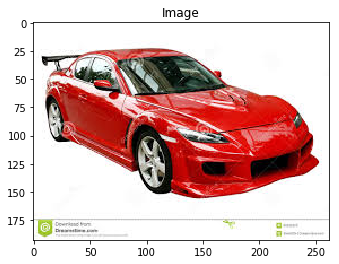

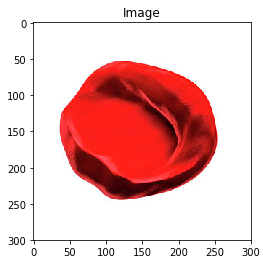

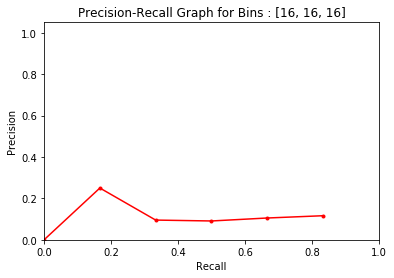

In [17]:
query(query='image/red.jpg', rank=10,
             precision_recall=True,
             relevant=['red.jpg', '39.jpg', '38.jpg', '40.jpg', '44.jpg', '30.jpg'])

Reading and analysing the query image...


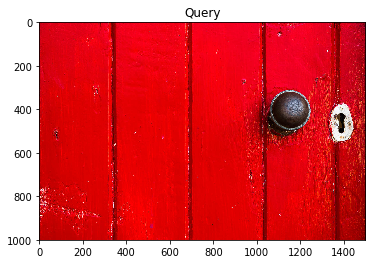

Wait while it's searching...
Hmm so the results are...


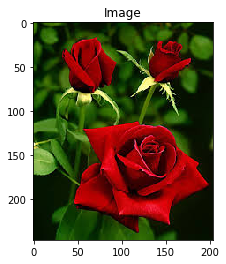

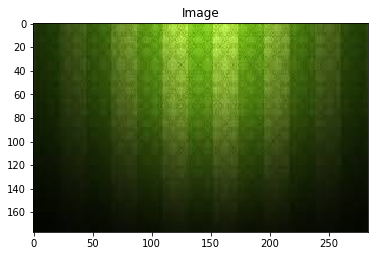

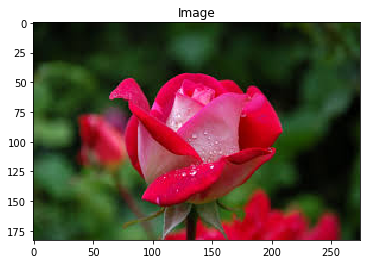

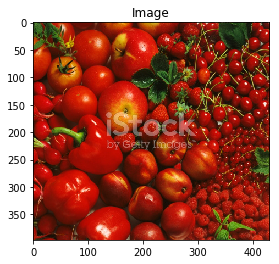

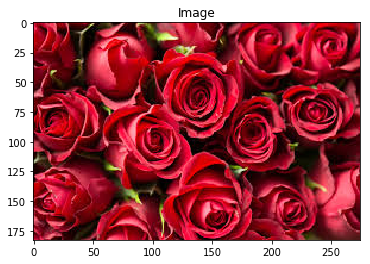

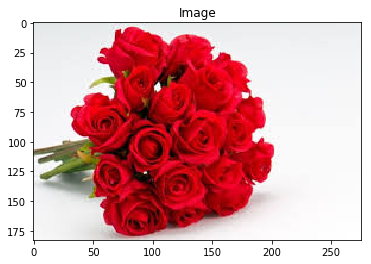

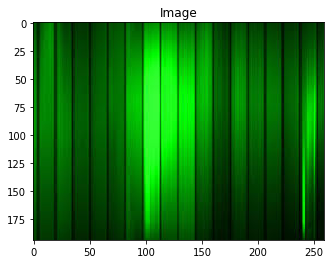

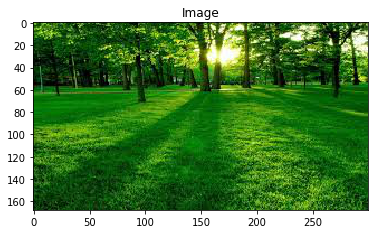

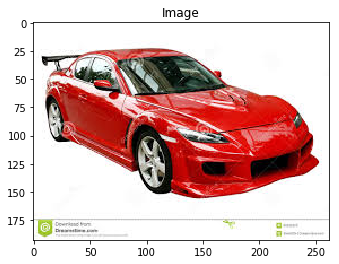

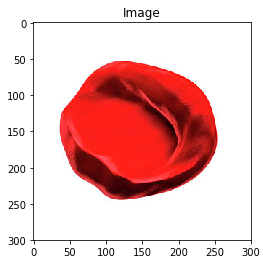

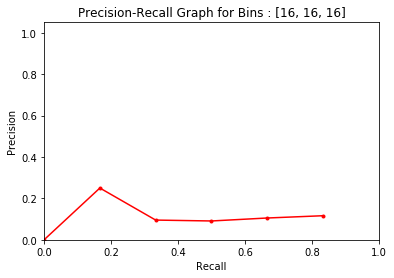

In [17]:
query(query='image/red.jpg', rank=10,
             precision_recall=True,
             relevant=['red.jpg', '39.jpg', '38.jpg', '40.jpg', '44.jpg', '30.jpg'])

**Testing CBIR engine performance with Bin Size : 64**

Reading and analysing the query image...


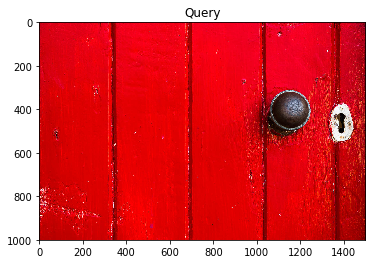

Wait while it's searching...
Hmm so the results are...


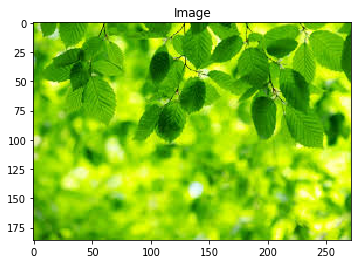

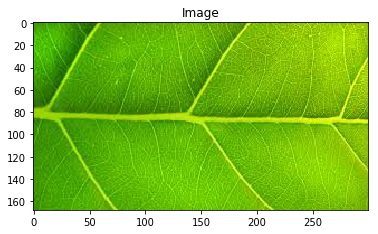

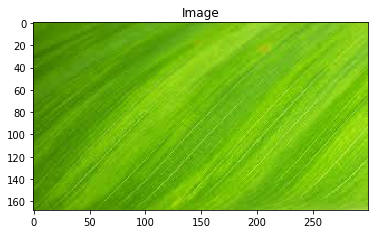

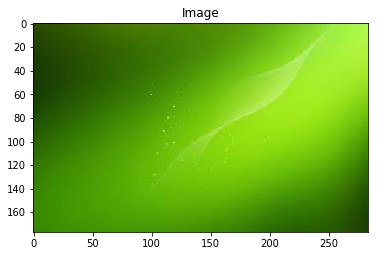

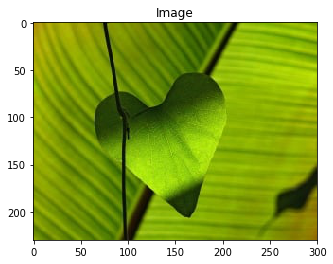

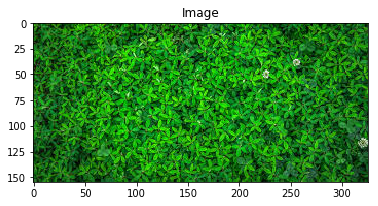

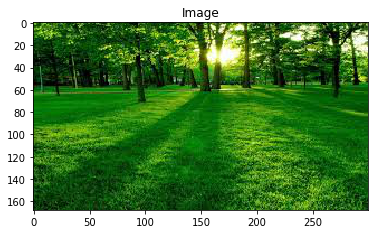

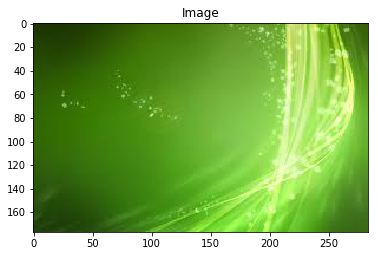

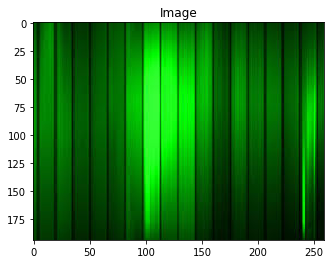

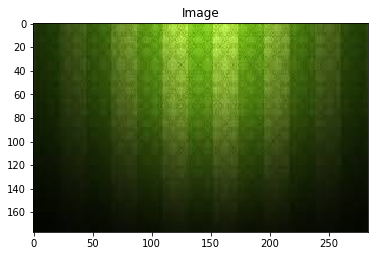

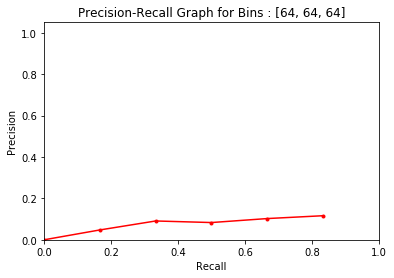

In [21]:
bins = bins_array[3]
query(query='image/red.jpg', rank=10,
             precision_recall=True,
             relevant=['red.jpg', '39.jpg', '38.jpg', '40.jpg', '44.jpg', '30.jpg'])